In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../..')
import gillespy2
from gillespy2 import Model, Species, Parameter, Reaction, Event, \
                      EventTrigger, EventAssignment, RateRule, \
                      AssignmentRule, FunctionDefinition
# from gillespy2 import SSACSolver
# from gillespy2 import VariableSSACSolver
# from gillespy2 import TauLeapingSolver
from gillespy2 import TauHybridSolver
# from gillespy2 import ODESolver

# Photosynthesis

$$C0_2 + 2 H_20 + photons \rightarrow CH_2O + 0_2 + H_20$$

https://en.wikipedia.org/wiki/Photosynthesis

cite: Whitmarsh J, Govindjee (1999). "Chapter 2: The Basic Photosynthetic Process". In Singhal GS, Renger G, Sopory SK, Irrgang KD, Govindjee (eds.). Concepts in Photobiology: Photosynthesis and Photomorphogenesis. Boston: Kluwer Academic Publishers. p. 13. ISBN 978-0-7923-5519-9.

In [26]:
class Photosynthesis(Model):
    def __init__(self, parameter_values=None):
        Model.__init__(self, name="Photosynthesis")
        self.volume = 1

        # Parameters
        self.add_parameter(Parameter(name="k1",expression="0.00001"))
        self.add_parameter(Parameter(name="D", expression="0.25"))
        self.add_parameter(Parameter(name="ka",expression="100"))
        self.add_parameter(Parameter(name="ka2",expression="80"))
        self.add_parameter(Parameter(name="kd",expression="1"))

        # Variables
        self.add_species(Species(name="CarbonDioxide", 
                        initial_value=80, mode="continuous"))
        self.add_species(Species(name="Water", 
                        initial_value=100, mode="continuous"))
        self.add_species(Species(name="Photons", 
                        initial_value=0, mode="continuous"))
        self.add_species(Species(name="Carbohydrate", 
                        initial_value=0, mode="dynamic", switch_min=70))
        self.add_species(Species(name="Oxygen", 
                        initial_value=100, mode="continuous"))
        
        # Assignment Rules
        self.add_rate_rule(RateRule(name="sunlight", 
                     formula="5*sin(t*2*pi/24)", variable="Photons"))
        

        # Reactions
        self.add_reaction(Reaction(name="Photosynthesis", 
             reactants={'CarbonDioxide': 1, 'Water': 2}, 
             products={'Carbohydrate': 1, 'Oxygen': 1, 'Water': 1}, 
             propensity_function="CarbonDioxide*2*Water*Photons*k1"))
        
        self.add_reaction(Reaction(name="WaterDiffusionIn", 
            reactants={}, 
            products={'Water': 1}, 
            propensity_function="D*ka"))
        self.add_reaction(Reaction(name="WaterDiffusionOut", 
            reactants={'Water': 1}, 
            products={}, 
            propensity_function="D*kd*Water"))
        self.add_reaction(Reaction(name="CarbonDioxideDiffusionIn", 
            reactants={}, 
            products={'CarbonDioxide': 1}, 
            propensity_function="D*ka2"))
        self.add_reaction(Reaction(name="CarbonDioxideDiffusionOut", 
            reactants={'CarbonDioxide': 1}, 
            products={}, 
            propensity_function="D*kd*CarbonDioxide"))
        self.add_reaction(Reaction(name="oxygenDiffusionIn", 
            reactants={}, 
            products={'Oxygen': 1}, 
            propensity_function="D*ka"))
        self.add_reaction(Reaction(name="oxygenDiffusionOut", 
            reactants={'Oxygen': 1}, 
            products={}, 
            propensity_function="D*kd*Oxygen"))

        

        # Timespan
        self.timespan(np.arange(0, 48, 0.05))

In [27]:
model = Photosynthesis()

# Run Simulation

In [28]:
%time results = model.run(solver=TauHybridSolver)

CPU times: user 1.35 s, sys: 59.6 ms, total: 1.41 s
Wall time: 1.54 s


# Visualization

In [29]:
results.plotplotly()

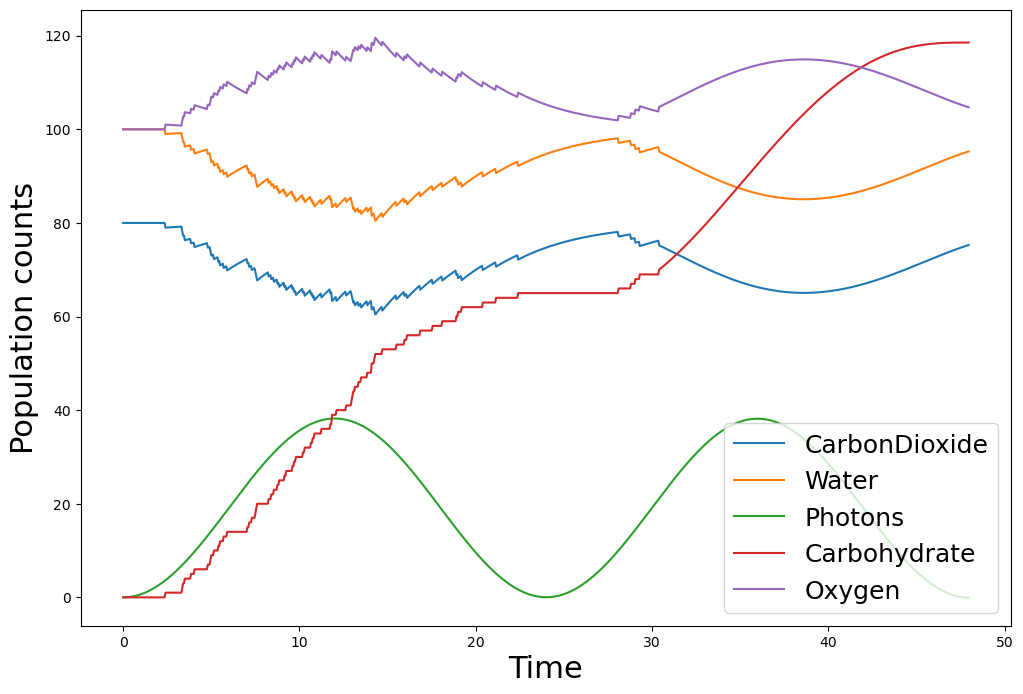

In [30]:
results.plot(figsize=(12,8))
plt.legend(fontsize=18)
plt.ylabel('Population counts', fontsize=22)
plt.xlabel('Time', fontsize=22)
plt.savefig('GillesPy2_photosynthesis_ex.pdf')